In [1]:
from Datasets import cifer10_datasets

Using TensorFlow backend.


In [2]:
from keras.models import load_model,Model
import numpy as np

## modelの読み込み

In [3]:
model_file = 'result/models/cifer10_double_basic_full_concanate_False_0.2.h5'
model = load_model(model_file)

In [4]:
data = cifer10_datasets(is_zero_center=True)

## 畳み込み層の抽出

In [5]:
conv_layers = model.layers[1:-2]
layer_output = [l.output for l in conv_layers]
activation_model = Model(inputs=model.input,outputs=layer_output)
activation_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 16)   448         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 32, 32, 16)   64          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 32, 32, 16)   0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

## テストデータ読み込み

In [6]:
activations = activation_model.predict(data.testX[:100])

In [7]:
for i in range(len(activations)):
    print(f'layer {i}:{activations[i].shape}')

layer 0:(100, 32, 32, 16)
layer 1:(100, 32, 32, 16)
layer 2:(100, 32, 32, 16)
layer 3:(100, 32, 32, 128)
layer 4:(100, 32, 32, 128)
layer 5:(100, 32, 32, 128)
layer 6:(100, 32, 32, 128)
layer 7:(100, 32, 32, 128)
layer 8:(100, 32, 32, 128)
layer 9:(100, 32, 32, 128)
layer 10:(100, 32, 32, 128)
layer 11:(100, 32, 32, 128)
layer 12:(100, 32, 32, 256)
layer 13:(100, 32, 32, 256)
layer 14:(100, 32, 32, 256)
layer 15:(100, 32, 32, 256)
layer 16:(100, 32, 32, 256)
layer 17:(100, 32, 32, 256)
layer 18:(100, 32, 32, 256)
layer 19:(100, 32, 32, 128)
layer 20:(100, 32, 32, 128)
layer 21:(100, 32, 32, 256)
layer 22:(100, 32, 32, 256)
layer 23:(100, 32, 32, 256)
layer 24:(100, 32, 32, 256)
layer 25:(100, 32, 32, 256)
layer 26:(100, 32, 32, 256)
layer 27:(100, 32, 32, 256)
layer 28:(100, 32, 32, 128)
layer 29:(100, 32, 32, 128)
layer 30:(100, 32, 32, 256)
layer 31:(100, 32, 32, 256)
layer 32:(100, 32, 32, 256)
layer 33:(100, 32, 32, 256)
layer 34:(100, 32, 32, 256)
layer 35:(100, 32, 32, 256)
layer

In [14]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (30.0, 30.0)
def plot_conv_outputs(outputs,start=0,end=0):
    filters = outputs.shape[2]
    if end == 0:
        end_fil = filters
    else:
        end_fil = end+1
    for i in range(end_fil-start):
        plt.subplot((end_fil-start)/6+1 , 6, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(f'filter {i+start}')
        plt.imshow(outputs[:,:,i])

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

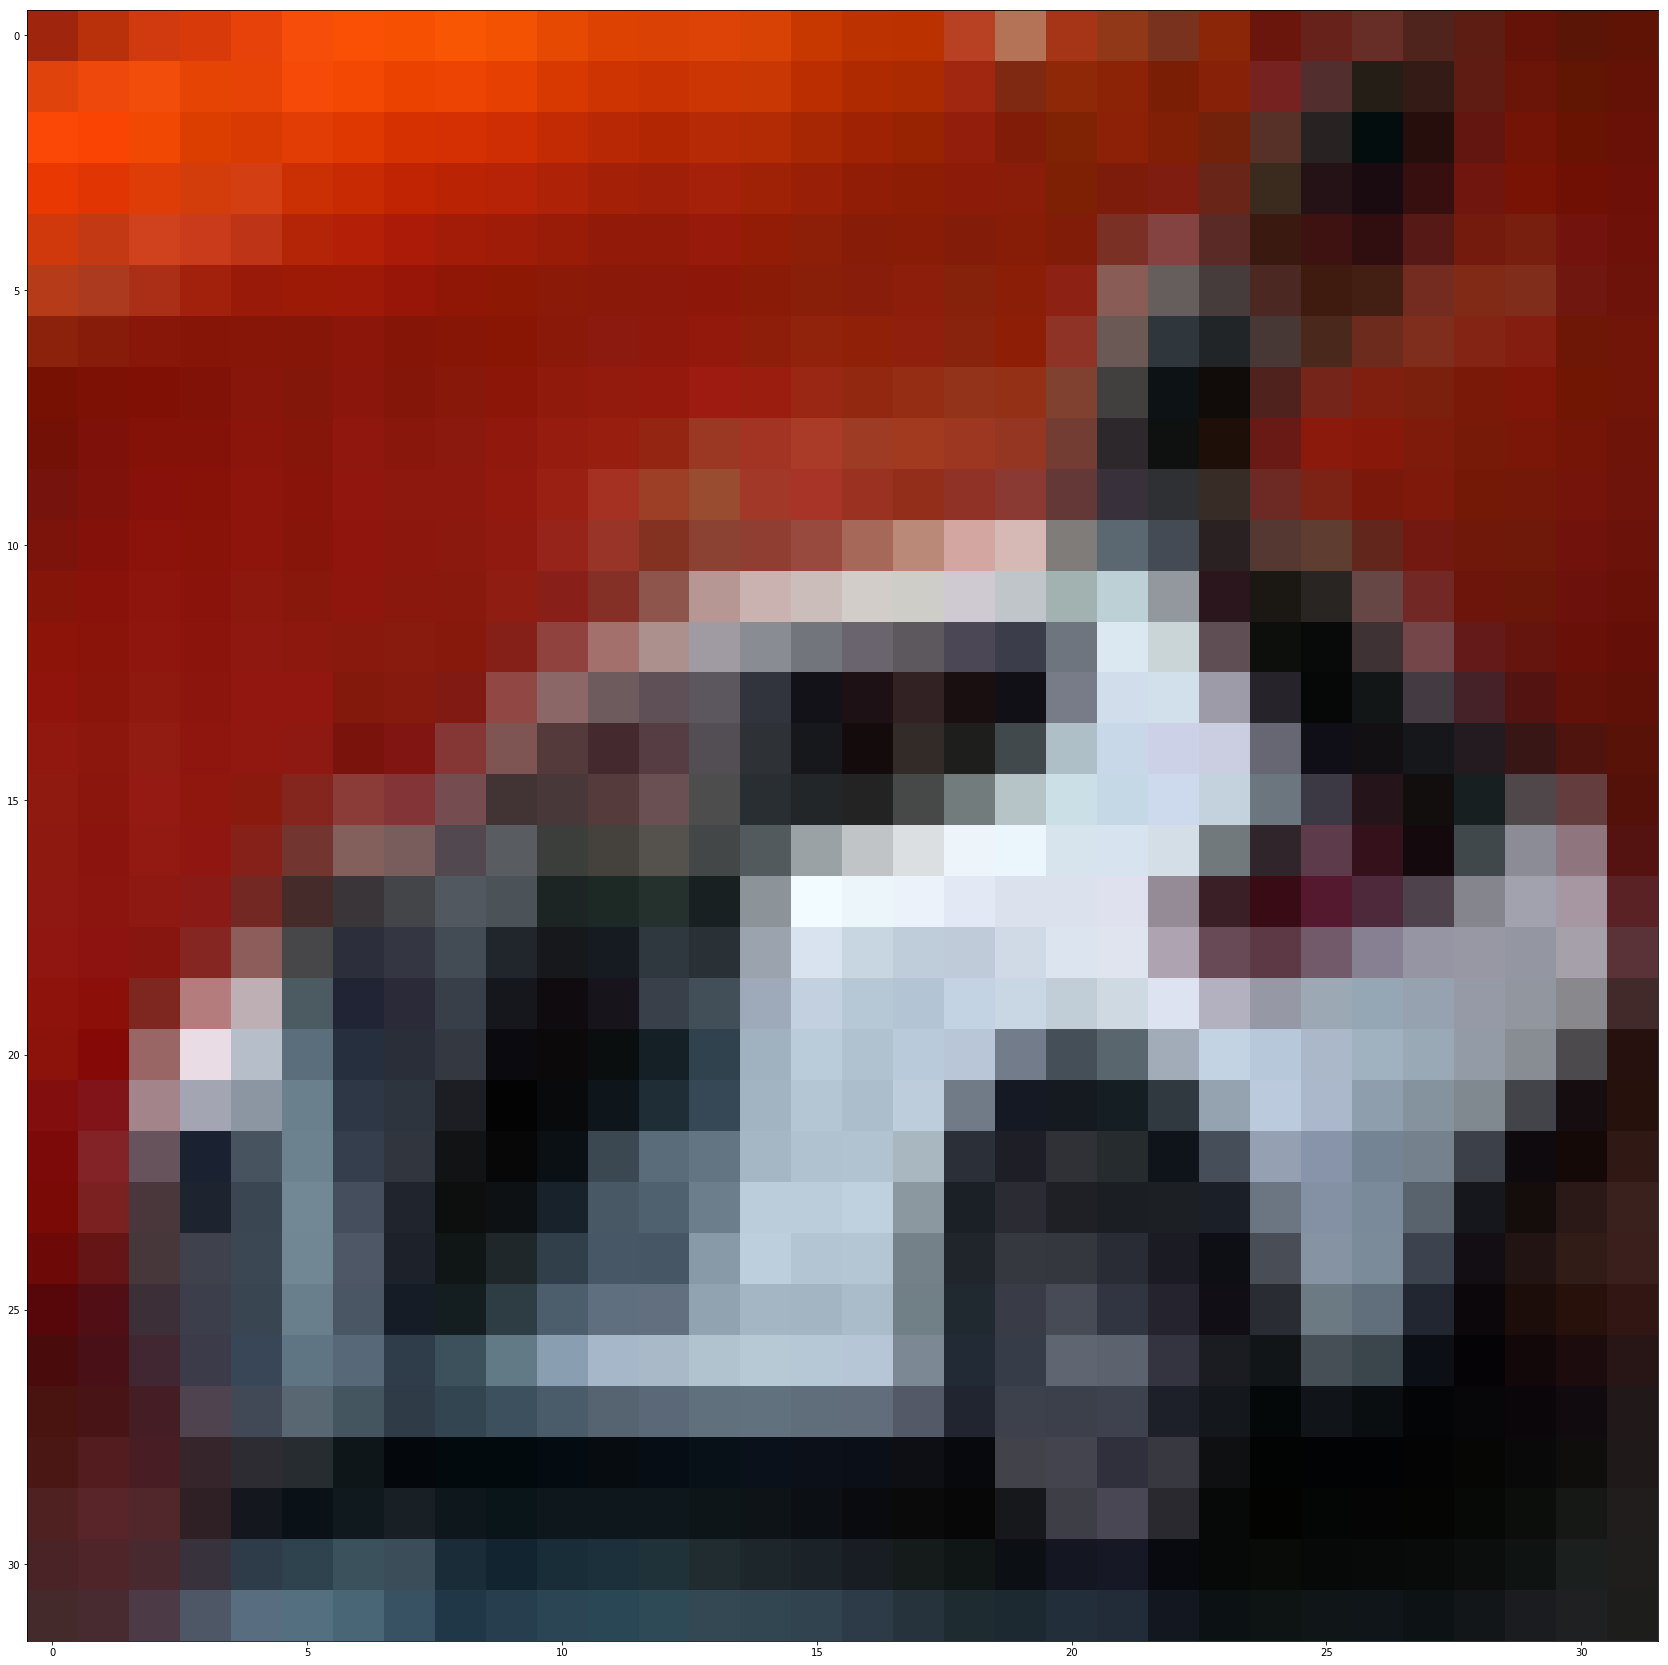

In [42]:
index = 6

plt.imshow(data.raw_testX[index],vmin=-0.5,vmax=0.5)
data.testY[index]

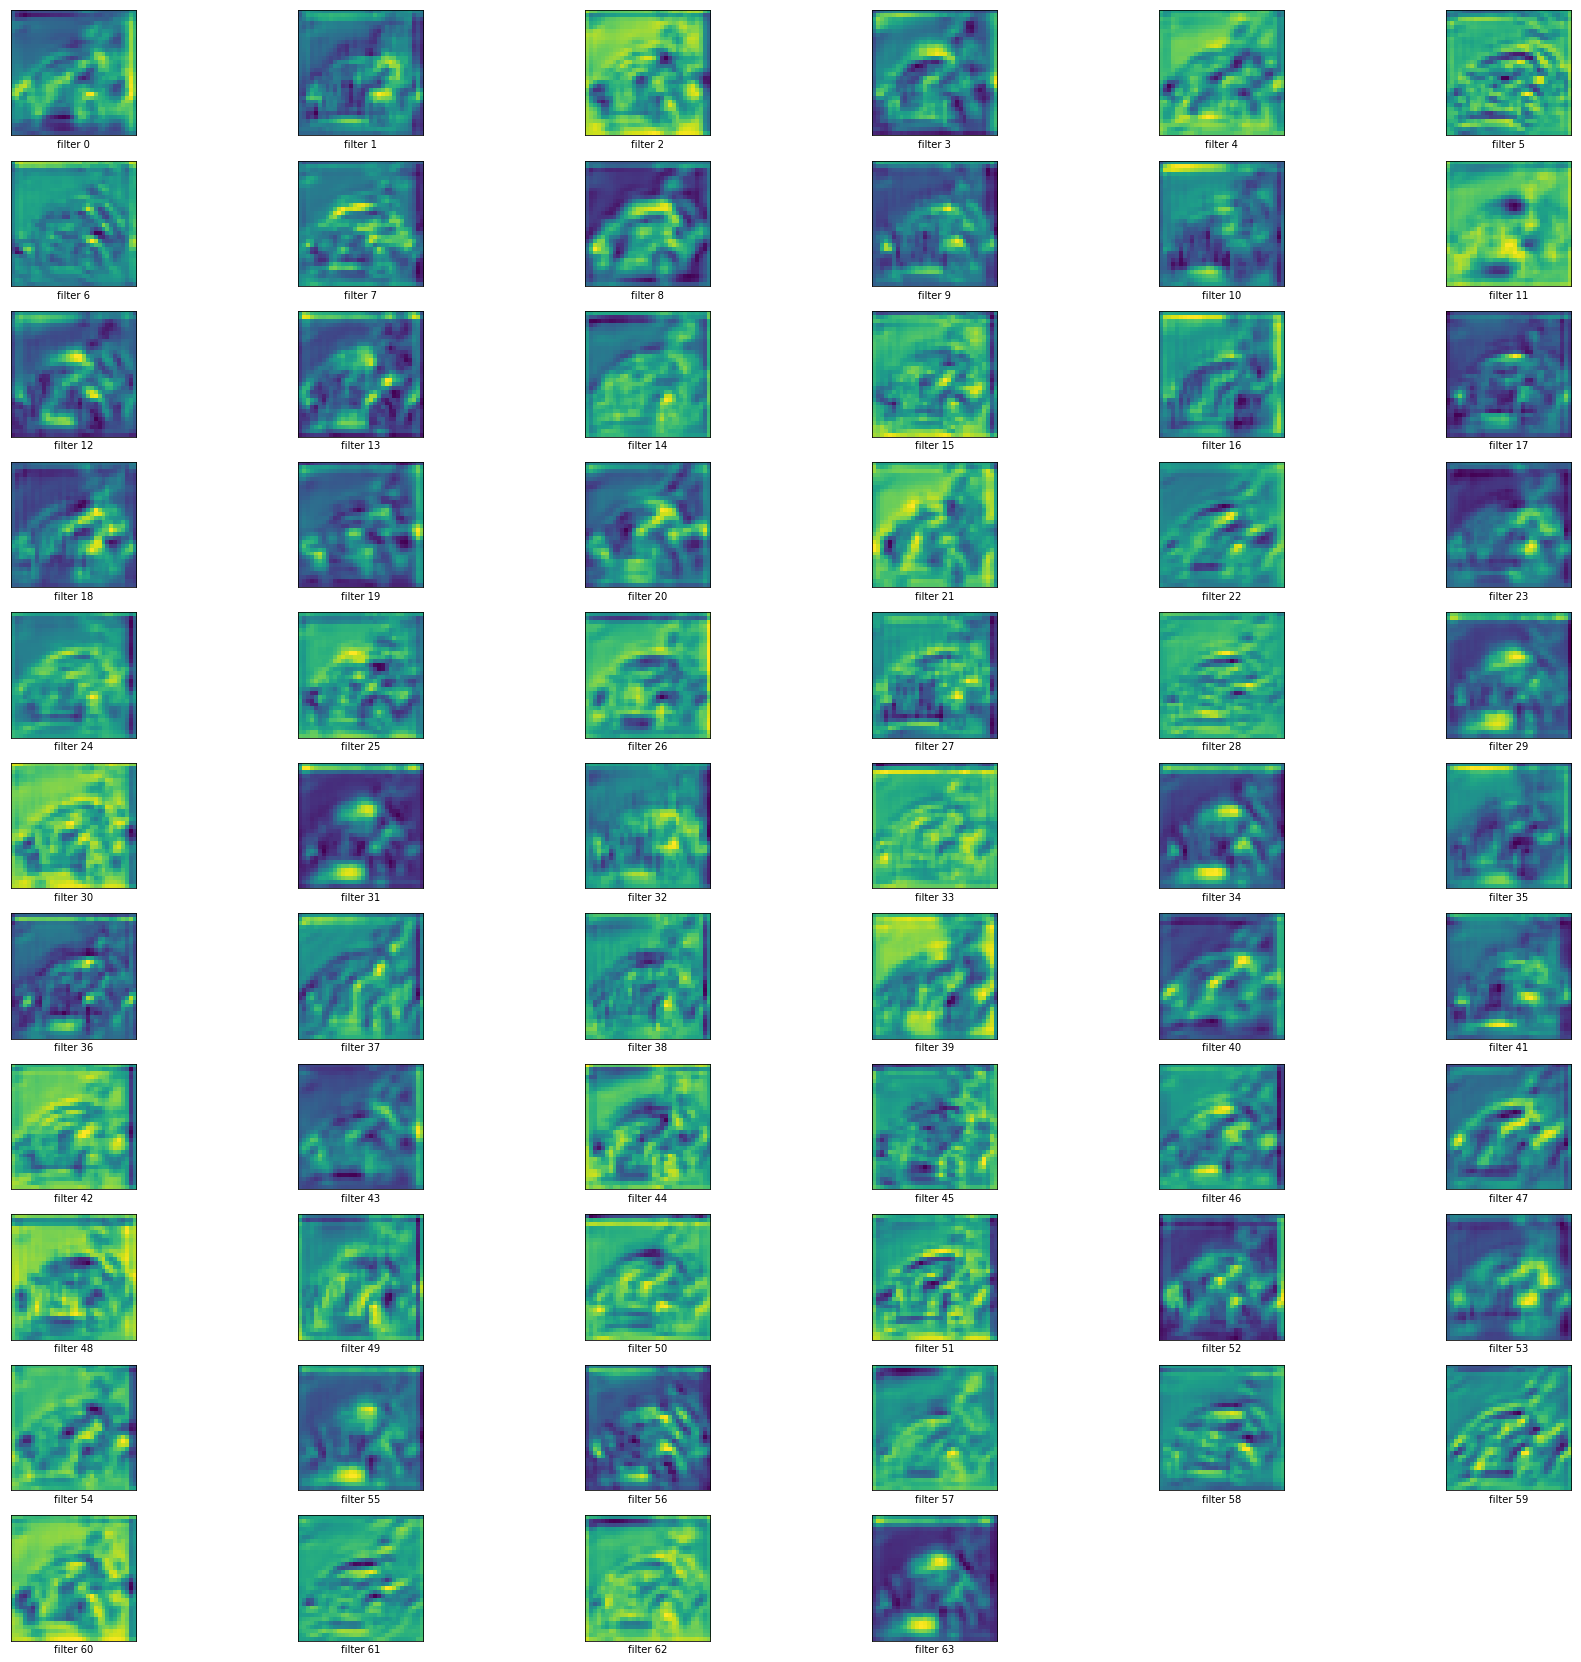

In [48]:
filter_index=19
plot_conv_outputs(activations[filter_index][index],start=0,end=63)

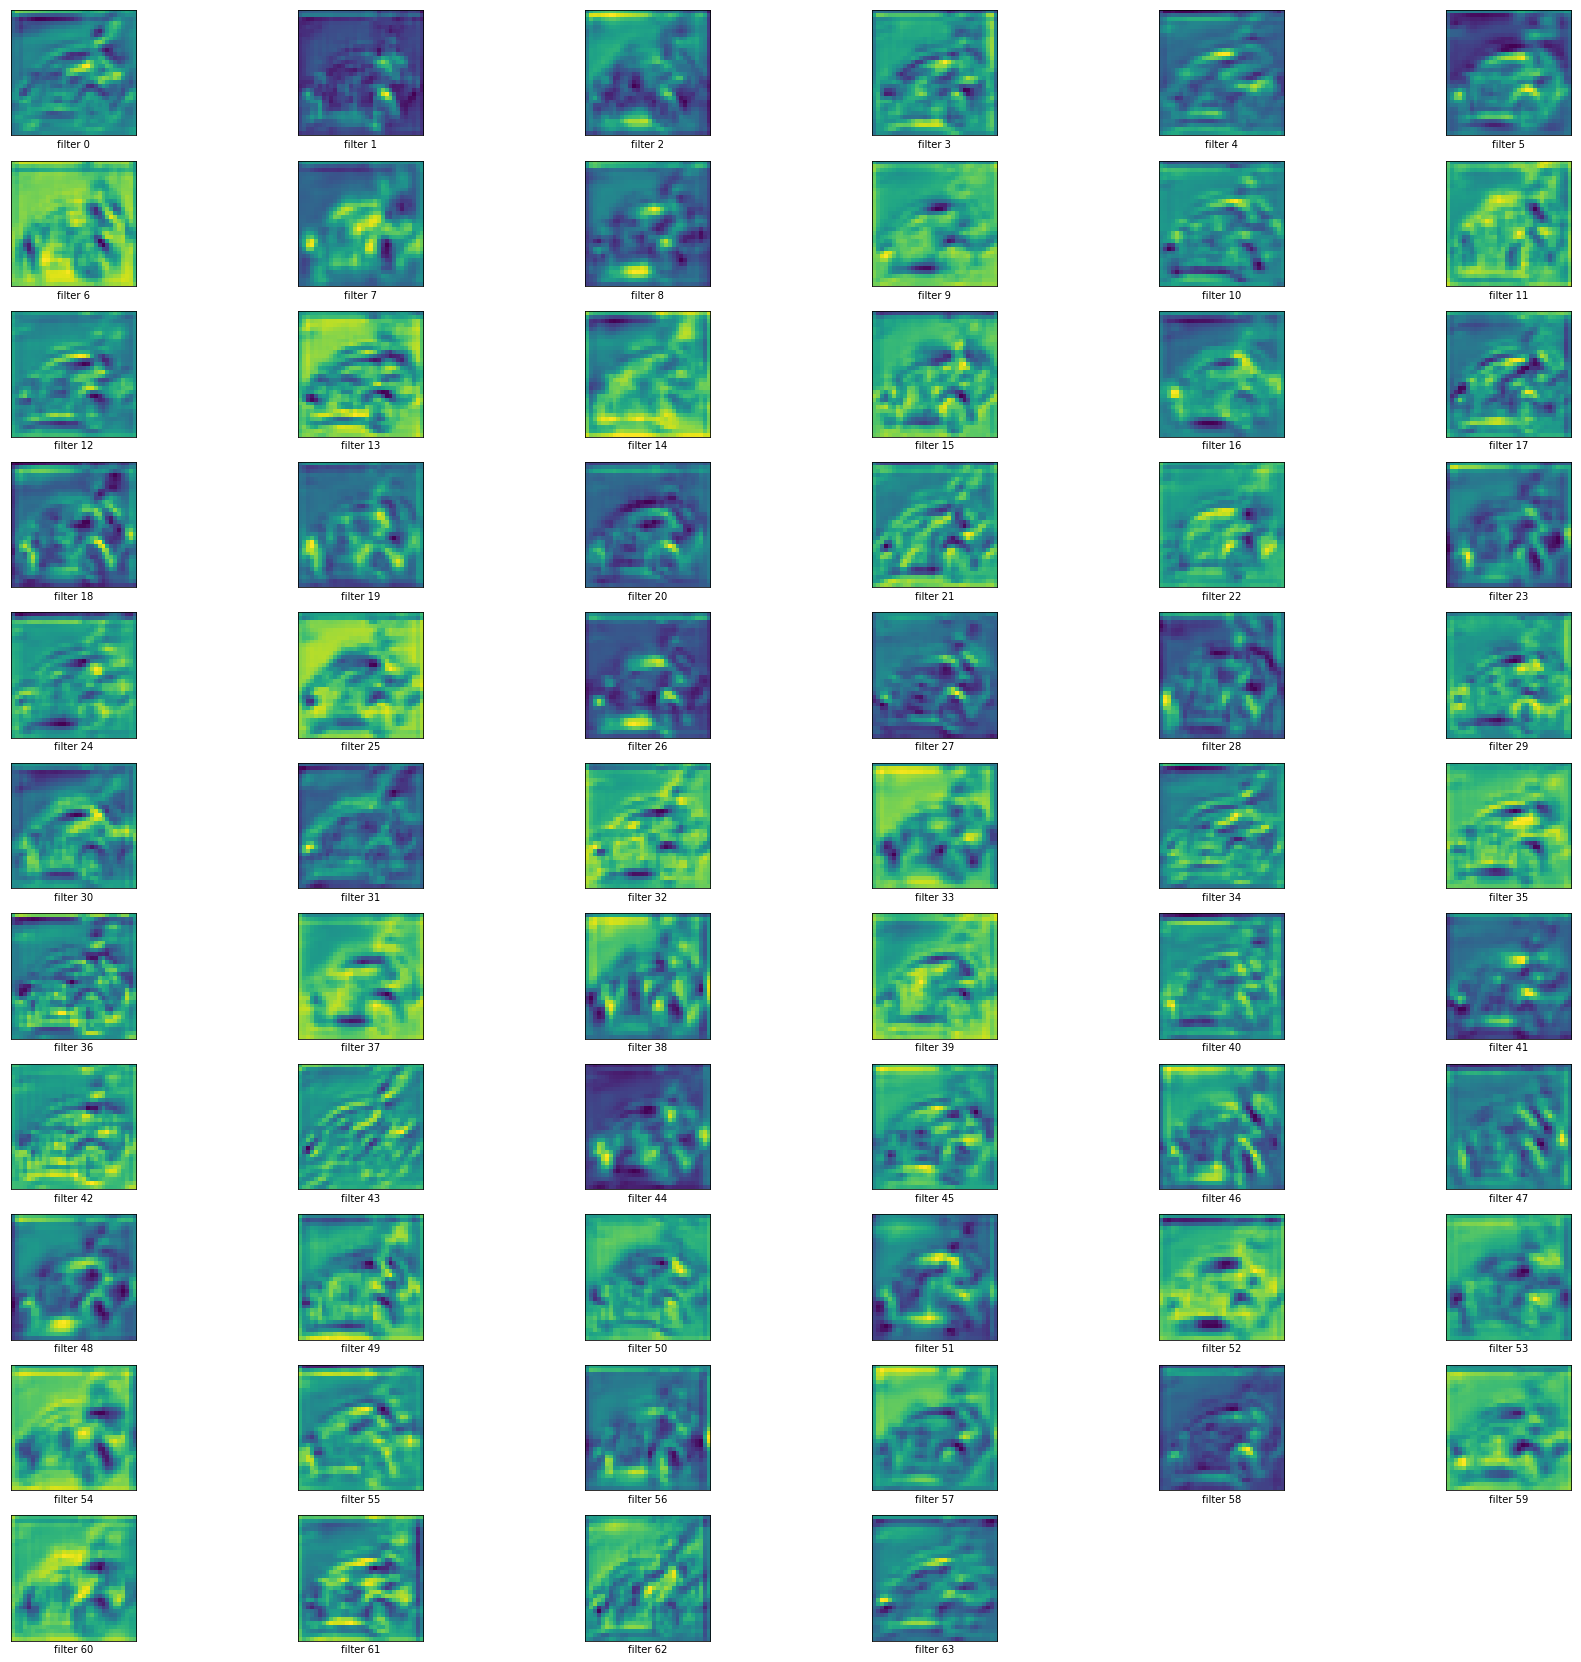

In [49]:
filter_index2=20
plot_conv_outputs(activations[filter_index2][index],start=0,end=63)

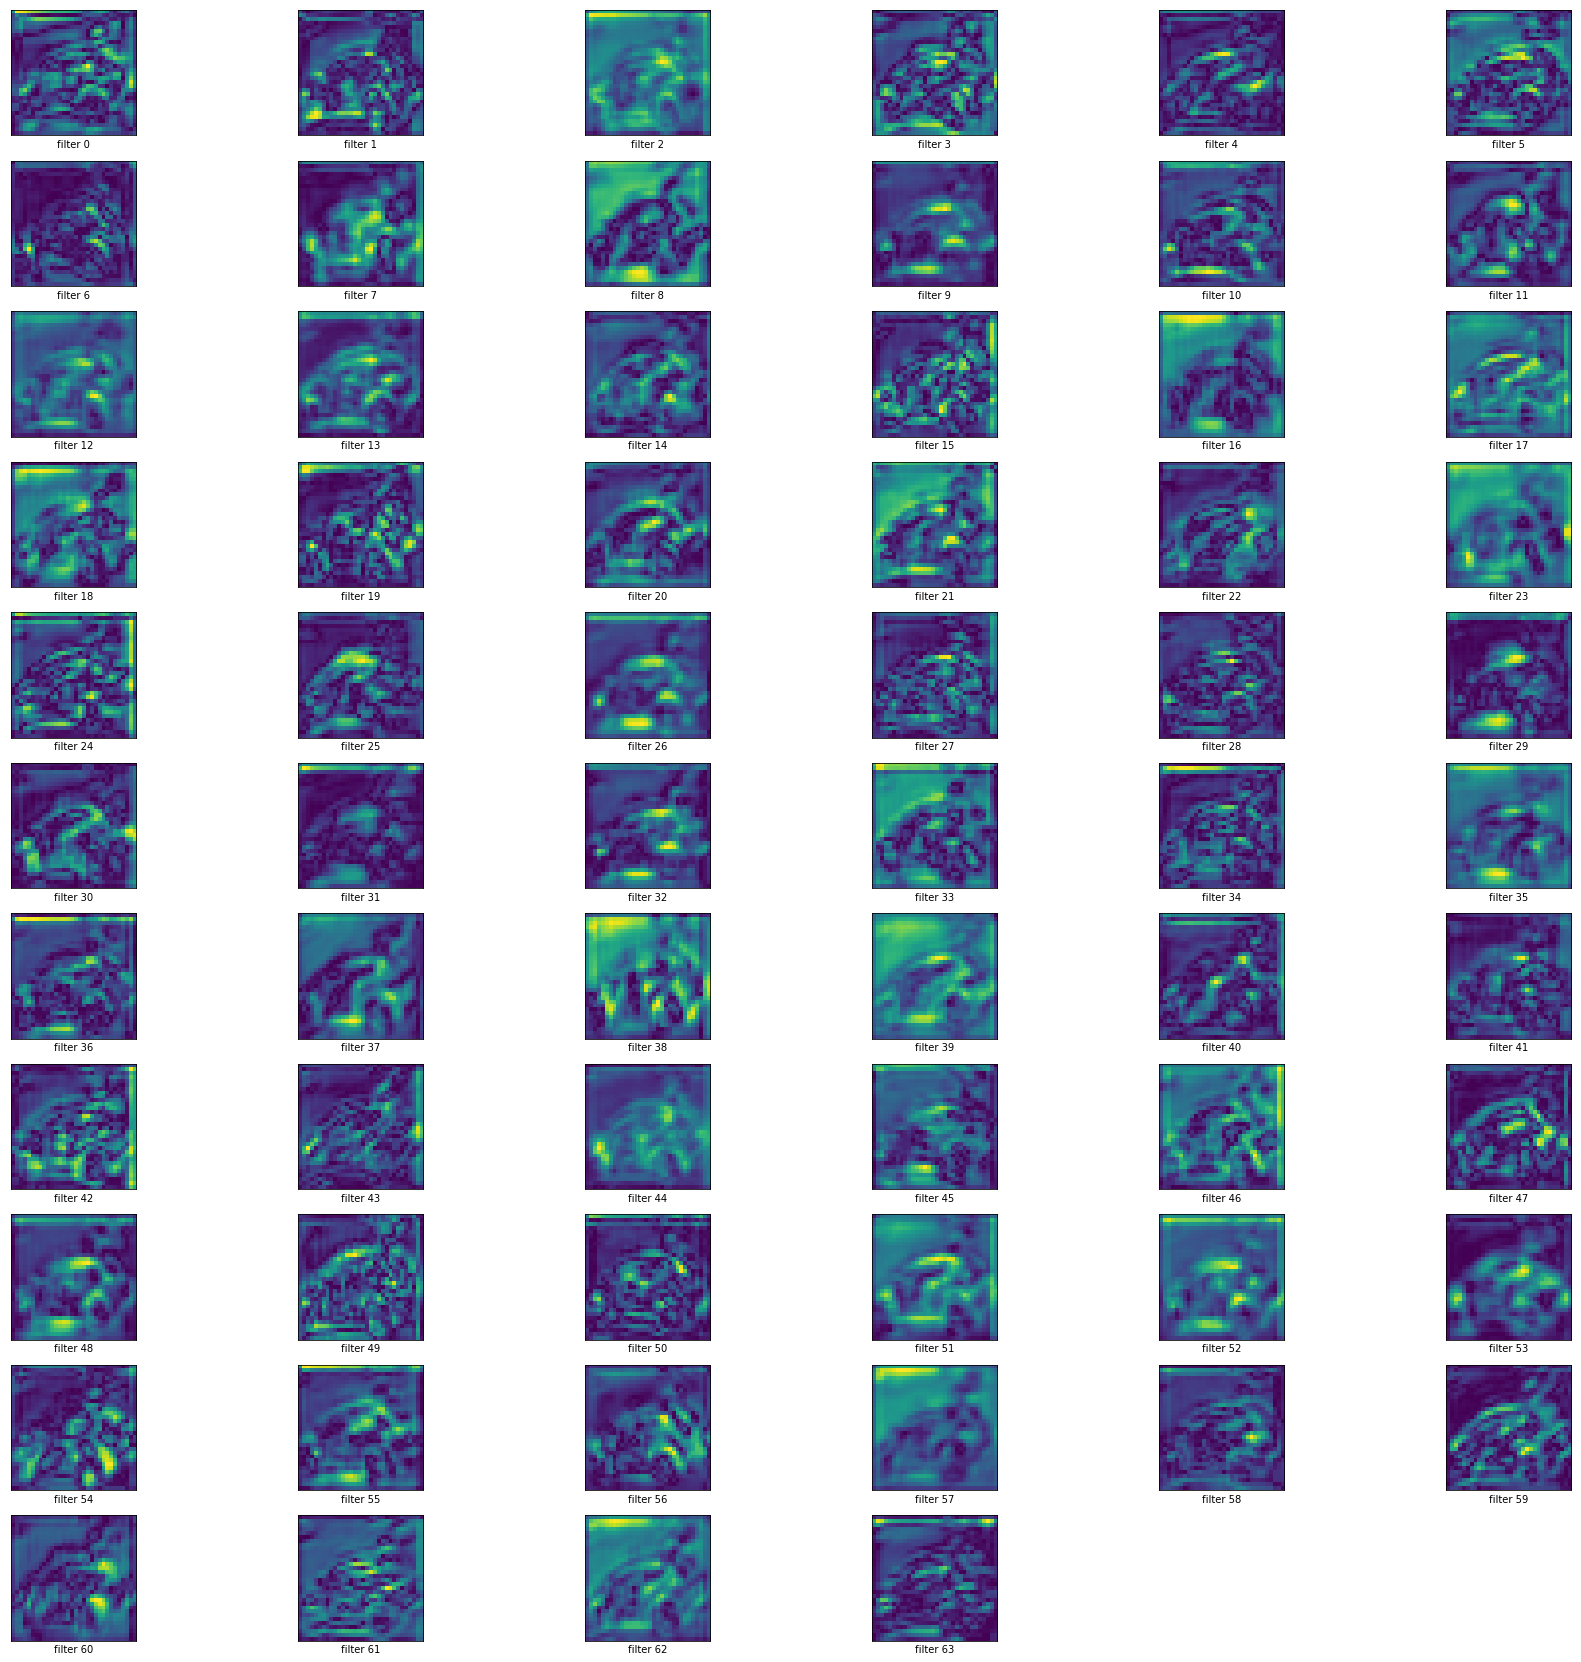

In [50]:
d_filter = abs(activations[filter_index][index] - activations[filter_index2][index])
plot_conv_outputs(d_filter,start=0,end=63)

In [51]:
#print('mean:'+str(d_filter.mean())+' max:'+str(d_filter.max())+' min:'+str(d_filter.min()))
print('mean:'+str(activations[filter_index][index].mean())+
      ' max:'+str(activations[filter_index][index].max())+
      ' min:'+str(activations[filter_index][index].min())+
      ' var:'+str(activations[filter_index][index].var()))
print('mean:'+str(activations[filter_index2][index].mean())+
      ' max:'+str(activations[filter_index2][index].max())+
      ' min:'+str(activations[filter_index2][index].min())+
      ' var:'+str(activations[filter_index2][index].var()))


mean:0.44755328 max:19.713646 min:-15.935005 var:10.93659
mean:0.4362132 max:20.573797 min:-16.456135 var:13.026472
